Iteration 0: Cost = 26951.0054
Iteration 0: Cost = 26951.0054, Weights = [4.12502e-02 9.89500e-05 3.26000e-05 9.55750e-04], Bias = 2.6799999999999998e-05
Iteration 1: Cost = 17265.6927
Iteration 2: Cost = 11129.8137
Iteration 3: Cost = 7242.5864
Iteration 4: Cost = 4779.9340
Iteration 5: Cost = 3219.7840
Iteration 6: Cost = 2231.3910
Iteration 7: Cost = 1605.2198
Iteration 8: Cost = 1208.5249
Iteration 9: Cost = 957.2087
Iteration 10: Cost = 797.9934
Iteration 11: Cost = 697.1262
Iteration 12: Cost = 633.2240
Iteration 13: Cost = 592.7400
Iteration 14: Cost = 567.0919
Iteration 15: Cost = 550.8428
Iteration 16: Cost = 540.5482
Iteration 17: Cost = 534.0259
Iteration 18: Cost = 529.8934
Iteration 19: Cost = 527.2749


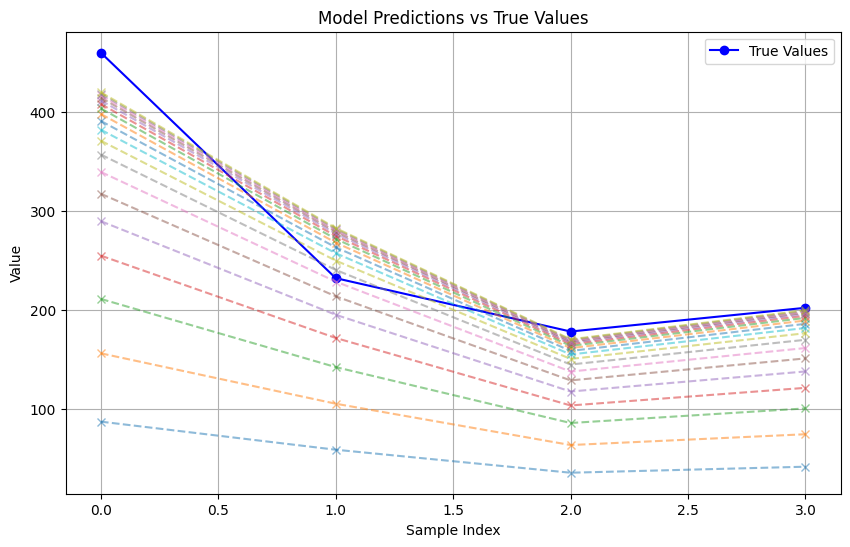

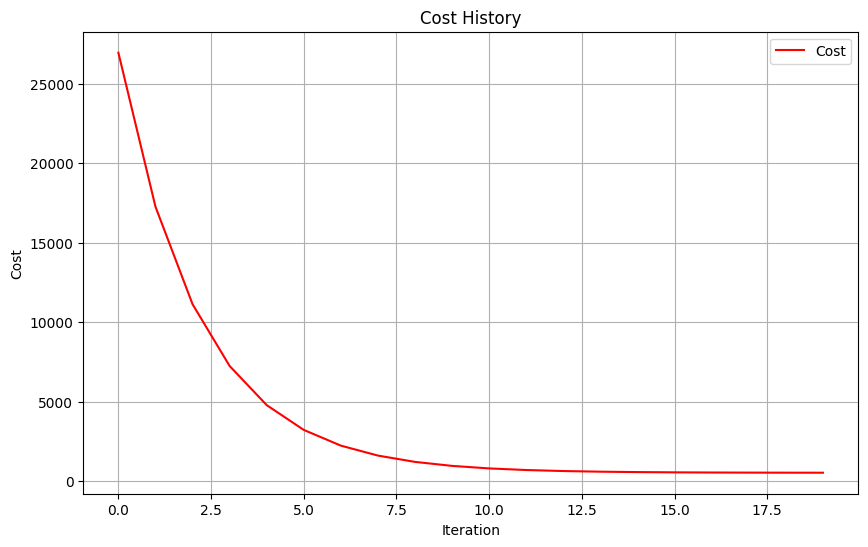

Final Weights: [2.00048219e-01 4.87296872e-04 1.31961684e-04 4.47121215e-03]
Final Bias: 0.0001244513267828422
Final Cost after 1000 iterations: 527.2749
Cost History: [np.float64(797.9933873762894), np.float64(697.1262198587626), np.float64(633.2240029636747), np.float64(592.7399712693076), np.float64(567.091923094431), np.float64(550.8428272803621), np.float64(540.5481938327456), np.float64(534.0258555035139), np.float64(529.8933568620122), np.float64(527.2748791462071)]


In [7]:
# Gradient descent for multiple linear regression
import numpy as np
import matplotlib.pyplot as plt

def hypothesis(X, weights, bias):
    """
    Computes the predictions of the linear model given the input features, weights, and bias.
    
    Parameters:
    X (numpy.ndarray): Input features of shape (m, n) where m is the number of samples and n is the number of features.
    weights (numpy.ndarray): Weights of shape (n,) corresponding to each feature.
    bias (float): Bias term for the model.
    
    Returns:
    numpy.ndarray: Predictions of shape (m,) for each sample.
    """
    # the predictions model is X @ weights + bias
    return np.dot(X, weights) + bias

def compute_cost(X, y, weights, bias):
    """
    Computes the cost of the linear regression model using mean squared error.

    Parameters:
    X (numpy.ndarray): Input features of shape (m, n).
    y (numpy.ndarray): True target values of shape (m,).
    weights (numpy.ndarray): Weights of shape (n,).
    bias (float): Bias term for the model.

    Returns:
    float: The mean squared error cost.
    """    
    # predictions = X @ weights + bias
    predictions = hypothesis(X, weights, bias)  
    # The cost function is 1/2m * sum((predictions - y)^2)   
    error = predictions - y
    cost = np.mean(error ** 2) / 2
    return predictions, cost

def compute_gradients(X, y, weights, bias):
    """
    Computes the gradients of the cost function with respect to weights and bias.

    Parameters:
    X (numpy.ndarray): Input features of shape (m, n).
    y (numpy.ndarray): True target values of shape (m,).
    weights (numpy.ndarray): Weights of shape (n,).
    bias (float): Bias term for the model.

    Returns:
    tuple: Gradients with respect to weights (numpy.ndarray) and bias (float).
    """
    m = y.shape[0]
    predictions = hypothesis(X, weights, bias)  # predictions = X @ weights + bias
    error = predictions - y

    # The derivative with respect to weights is (1/m) * X.T @ (predictions - y)
    dw = (1 / m) * X.T @ error
    # the derivate with respect to bias is 1/m * sum(predictions - y)
    db = (1 / m) * np.sum(error)
    return dw, db
    
def gradient_descent(X, y, weights, bias, learning_rate=0.01, num_iter=1000):
    """
    Performs gradient descent to learn weights and bias for linear regression.

    Parameters:
    X (numpy.ndarray): Input features of shape (m, n).
    y (numpy.ndarray): True target values of shape (m,).
    weights (numpy.ndarray): Initial weights of shape (n,).
    bias (float): Initial bias term.
    learning_rate (float): Learning rate for gradient descent.
    num_iterations (int): Number of iterations to perform.

    Returns:
    tuple: Final weights (numpy.ndarray), final bias (float), and history of costs (list).
    """
    cost_history = []
    p_history = []

    for i in range(num_iter):
        # Compute gradients
        dw, db = compute_gradients(X, y, weights, bias)
        # Update weights and bias
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Compute cost and store it in history
        predictions, cost = compute_cost(X, y, weights, bias)
        print(f"Iteration {i}: Cost = {cost:.4f}")  # Debugging output
        p_history.append(predictions)
        cost_history.append(cost)
        
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}, Weights = {weights}, Bias = {bias}")

    return weights, bias, cost_history, p_history

def plot_predictions(p, y):
    """
    Plots the predictions against the true values.

    Parameters:
    p (list): List of predictions from the model.
    y (numpy.ndarray): True target values.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(y, label='True Values', color='blue', marker='o')
    for i in range(len(p) - 1):
        plt.plot(p[i], linestyle='--', marker='x', alpha=0.5)
    plt.title('Model Predictions vs True Values')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid()
    plt.show()

def plot_cost_history(cost_history):
    """
    Plots the cost history over iterations.

    Parameters:
    cost_history (list): List of costs recorded during training.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(cost_history, label='Cost', color='red')
    plt.title('Cost History')
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.legend()
    plt.grid()
    plt.show()

# Example usage:
if __name__ == "__main__":
    # Sample data
    X = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35], [1000, 3, 1, 10]])
    y = np.array([460, 232, 178, 202])
    
    # Initial weights and bias
    weights = np.zeros(X.shape[1])
    bias = 0.0
    
    # Perform gradient descent
    final_weights, final_bias, cost_history, p_history = gradient_descent(X, y, weights, bias, learning_rate=1e-7, num_iter=20)

    # Plot predictions
    plot_predictions(p_history, y)
    # Plot cost history
    plot_cost_history(cost_history)

    # Final results
    # Return the final weights, bias, and cost history
    print("Final Weights:", final_weights)
    print("Final Bias:", final_bias)
    print(f"Final Cost after 1000 iterations: {cost_history[-1]:.4f}")
    print("Cost History:", cost_history[-10:])  # Print last 10 costs for brevity
    

